In [8]:
#Read the file from ftp
setwd("~/Documents/Thesis_Material//Rat_Alcohol/AGP_analysis/AGP_jupyter")
AGP<-read.delim("ag-cleaned_L6.txt", header=T)

#gathering samples that are only fecal samples
AGP_fecal<-subset(AGP, AGP$SIMPLE_BODY_SITE=="FECAL")

#Created a subset of fecal samples from non ("Never) and daily ("Daily") drinkers
AGP_never2daily<-subset(AGP_fecal, AGP_fecal$ALCOHOL_FREQUENCY=="Never" | AGP_fecal$ALCOHOL_FREQUENCY=="Daily")

#Creating categories as factors
AGP_never2daily$ALCOHOL_FREQUENCY<-factor(AGP_never2daily$ALCOHOL_FREQUENCY)
AGP_never2daily<-AGP_never2daily[,c(177,186,396,434,983,987,1051,1054,1059,1063,1065,709,1267,978,984,989,1429,1431,1435,1446,1451,1043,1049,1494,1057,1060,1061,1506,1520,1527,1581,1411,1414,1419,1427,1428,1433,1447,1461,1462,1472,1473,1479,1484,1500,1505,1508,1539,1543,1568,1614,1615,1695,2247,1880,1901,1917,1923,2013,2014,2015,2168,2175,2242,2365)]
AGP_never2daily$BMI_CAT<-factor(AGP_never2daily$BMI_CAT)

#finding the mean abundance of Prevotella between Non and Daily Drinkers
treat0<-subset(AGP_never2daily, AGP_never2daily$ALCOHOL_FREQUENCY=="Never")
treat1<-subset(AGP_never2daily, AGP_never2daily$ALCOHOL_FREQUENCY=="Daily")

In [10]:
AGP_never2daily

,SEX,ALCOHOL_FREQUENCY,BMI_CAT,AGE_CORRECTED,k__Bacteria.p__Actinobacteria.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__,k__Bacteria.p__Actinobacteria.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Eggerthella,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__S24.7.g__,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__.Odoribacteraceae..g__Butyricimonas,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__.Paraprevotellaceae..g__Paraprevotella,⋯,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Comamonadaceae.g__Limnobacter,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Oxalobacteraceae.g__,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Oxalobacteraceae.g__Oxalobacter,k__Bacteria.p__Proteobacteria.c__Deltaproteobacteria.o__Desulfovibrionales.f__Desulfovibrionaceae.g__,k__Bacteria.p__Proteobacteria.c__Deltaproteobacteria.o__Desulfovibrionales.f__Desulfovibrionaceae.g__Bilophila,k__Bacteria.p__Proteobacteria.c__Deltaproteobacteria.o__Desulfovibrionales.f__Desulfovibrionaceae.g__Desulfovibrio,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Klebsiella,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Proteus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter,k__Bacteria.p__Tenericutes.c__RF3.o__ML615J.28.f__.g__
3,male,Never,Normal,31,0.000387812,0,0,5.54e-05,5.54e-05,5.54e-05,⋯,0,0,0,0,0,0.000110803,0,0.000166205,0.000110803,0
6,male,Never,Normal,40,0.000278206,0.000404664,5.06e-05,5.06e-05,0.001669238,0.000126457,⋯,0,0,0,0,0.001138117,0,0.00085991,0.000328789,7.59e-05,2.53e-05
9,female,Never,Unknown,30,0.000143154,0.000286307,0.001073653,0,0.005797724,7.16e-05,⋯,0,0,0,0,0.002505189,0,7.16e-05,0,0,0
15,female,Daily,Overweight,59,0.000634484,0.000158621,0.002379316,0,0.003172421,0,⋯,0,0,0.000475863,0,0.001797705,0,0,0,0,0.000211495
16,male,Never,Overweight,25,0.000243652,8.12e-05,8.12e-05,0,0.003329904,0.007526125,⋯,0,0,0.000351941,0,0.004087931,0.000893389,2.71e-05,0,0,0
18,male,Never,Normal,38,0.002117683,0.000453789,0,0,0,0,⋯,0,0,0,0,0.000151263,0.000302526,0.000151263,0.000302526,0,0
20,female,Never,Overweight,63,0.000270563,0.000135281,0,0,0,0.004329004,⋯,0,0,0,0,0.001352814,0.000270563,0.002299784,0,0,0.002164502
23,male,Never,Unknown,Unknown,2.03e-05,0.000811244,0,6.08e-05,2.03e-05,0,⋯,0,0,0,0,0.00036506,0,2.03e-05,0,8.11e-05,0
24,male,Never,Unknown,6,0.000481825,0,5.35e-05,5.35e-05,0.000588897,0,⋯,0,0,0,0,5.35e-05,5.35e-05,0,0,0.000695969,0.000214144
29,female,Never,Normal,51,0.000984378,6.42e-05,0.000171196,6.42e-05,0.002118553,0.004793495,⋯,0,2.14e-05,0.000877381,0.002931736,0.002353948,0.001390969,0,0,2.14e-05,0.000278194


In [11]:
#Comparison of significant taxa between rat and AGP data: Substituting "NA"s 
    AGP_NA<-AGP_never2daily
    AGP_NA[,5:65][AGP_never2daily[,5:65]=="0"]<-NA
    AGP_NA<-na.pass(AGP_NA)
    AGP_NA$ALCOHOL_FREQUENCY<-factor(AGP_NA$ALCOHOL_FREQUENCY)


Call:
lm(formula = log(AGP_NA[, 11]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6296 -1.4583 -0.4489  0.8881  6.8116 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -8.0506     0.1075 -74.920  < 2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever  -0.3861     0.1336  -2.889  0.00395 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 980 degrees of freedom
  (1205 observations deleted due to missingness)
Multiple R-squared:  0.008447,	Adjusted R-squared:  0.007435 
F-statistic: 8.348 on 1 and 980 DF,  p-value: 0.003946


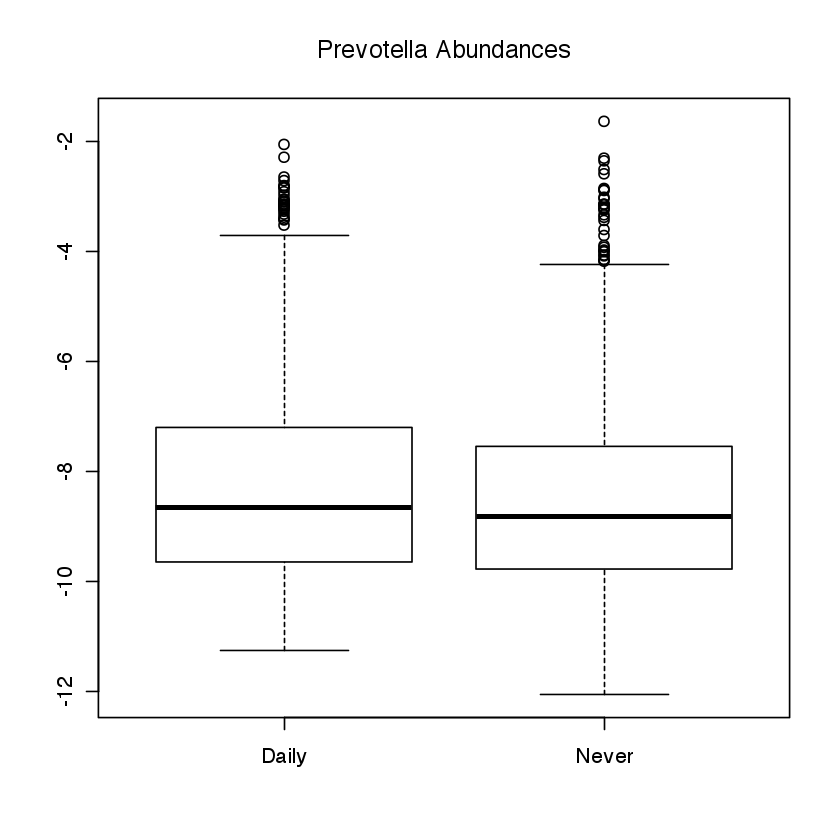

In [12]:
  #Prevotella : higher abundances in drinkers, opposite of rat data
    lm.prevotella<-lm(log(AGP_NA[,11])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.prevotella)
    boxplot(log(AGP_NA[,11])~AGP_NA$ALCOHOL_FREQUENCY, main="Prevotella Abundances")



Call:
lm(formula = log(AGP_NA[, 8]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0575 -2.0425 -0.6859  2.0303  6.6725 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -7.3785     0.1322 -55.821   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever  -0.3926     0.1642  -2.391    0.017 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.466 on 987 degrees of freedom
  (1198 observations deleted due to missingness)
Multiple R-squared:  0.00576,	Adjusted R-squared:  0.004752 
F-statistic: 5.718 on 1 and 987 DF,  p-value: 0.01698


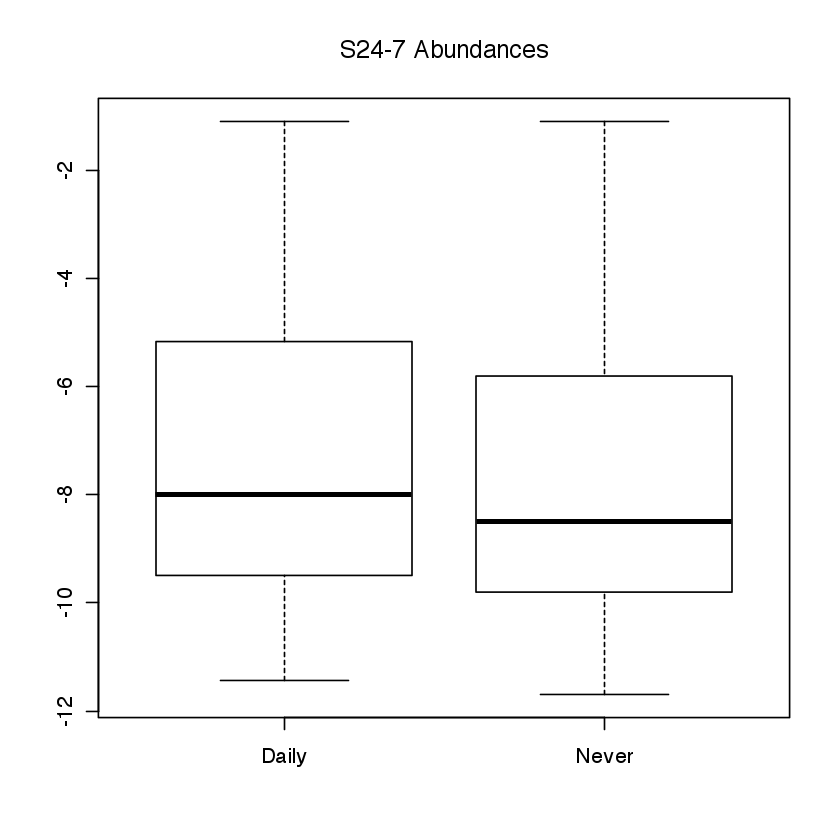

In [13]:
  #S24-7 : higher abundance in drinkers, as is somewhat similar to rats in that the final abundance is greater in drinkers vs. non
    lm.S247<-lm(log(AGP_NA[,8])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.S247)
    boxplot(log(AGP_NA[,8])~AGP_NA$ALCOHOL_FREQUENCY, main="S24-7 Abundances")


Call:
lm(formula = lachno_all ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2513 -0.4460  0.1053  0.5545  1.7400 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.60192    0.03496 -74.416   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.01543    0.04294  -0.359    0.719    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7935 on 1526 degrees of freedom
  (659 observations deleted due to missingness)
Multiple R-squared:  8.456e-05,	Adjusted R-squared:  -0.0005707 
F-statistic: 0.129 on 1 and 1526 DF,  p-value: 0.7195


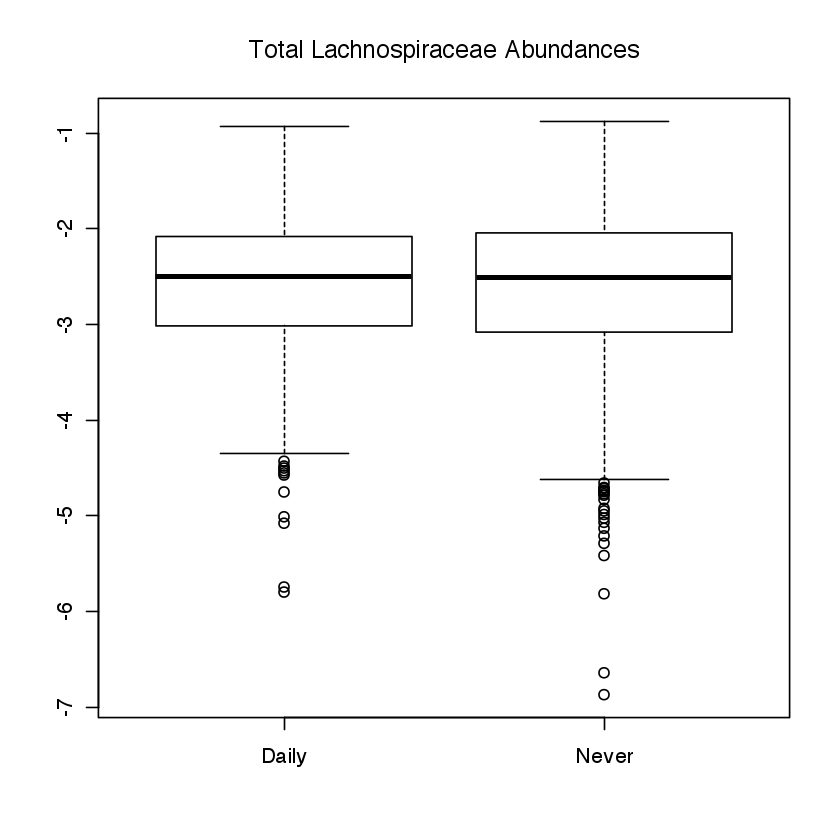

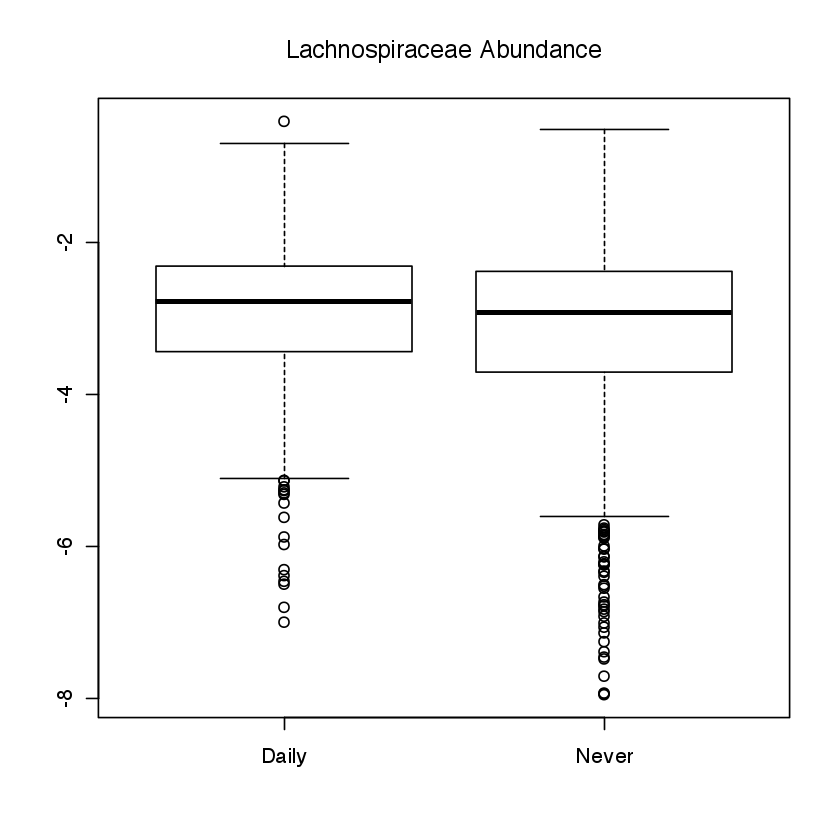

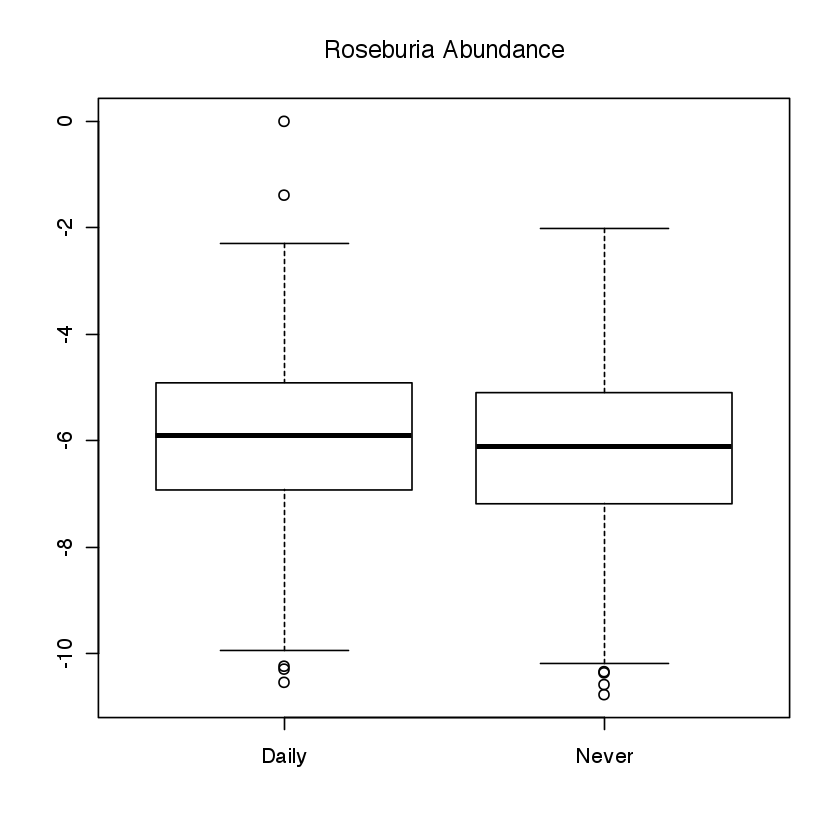

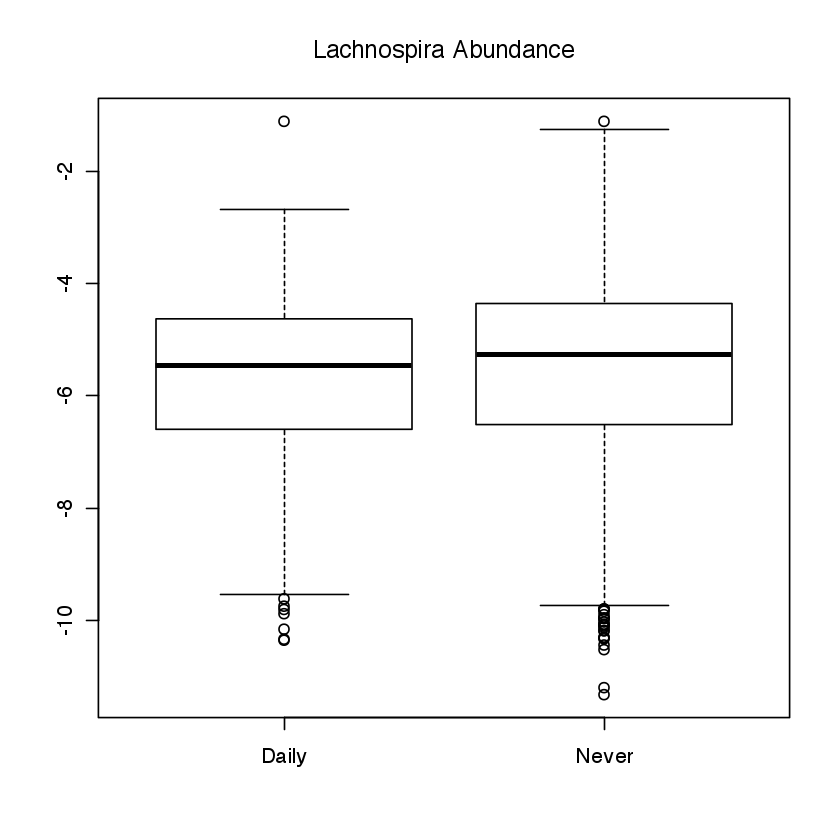

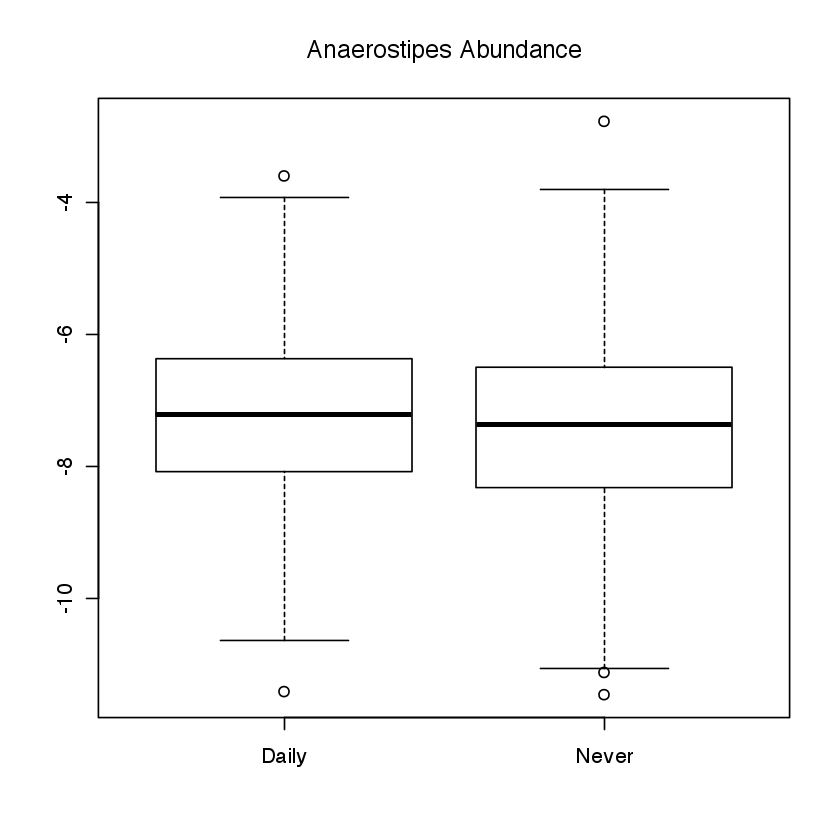

In [9]:
  #Lachnospiraceae
    lachno_all<-log(AGP_NA[,39]+AGP_NA[,43]+AGP_NA[,42]+AGP_NA[,40])
    lm.lachno<-lm(lachno_all~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.lachno)
    boxplot(lachno_all~AGP_NA$ALCOHOL_FREQUENCY, main="Total Lachnospiraceae Abundances")
    boxplot(log(AGP_NA[,39])~AGP_NA$ALCOHOL_FREQUENCY, main="Lachnospiraceae Abundance") #higher abundance in drinkers
    boxplot(log(AGP_NA[,43])~AGP_NA$ALCOHOL_FREQUENCY, main="Roseburia Abundance") #higher abundance in drinkers (Roseburia)
    boxplot(log(AGP_NA[,42])~AGP_NA$ALCOHOL_FREQUENCY, main="Lachnospira Abundance") #lower abundance in drinkers (Lachnospira)
    boxplot(log(AGP_NA[,40])~AGP_NA$ALCOHOL_FREQUENCY, main="Anaerostipes Abundance") #higher abundace in drinkers (Anaerostipes)


Call:
lm(formula = log(AGP_NA[, 55]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7885 -1.2283  0.3083  1.4037  4.3931 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -5.93401    0.07475 -79.380  < 2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.25082    0.09098  -2.757  0.00589 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 1762 degrees of freedom
  (423 observations deleted due to missingness)
Multiple R-squared:  0.004295,	Adjusted R-squared:  0.00373 
F-statistic: 7.601 on 1 and 1762 DF,  p-value: 0.005895


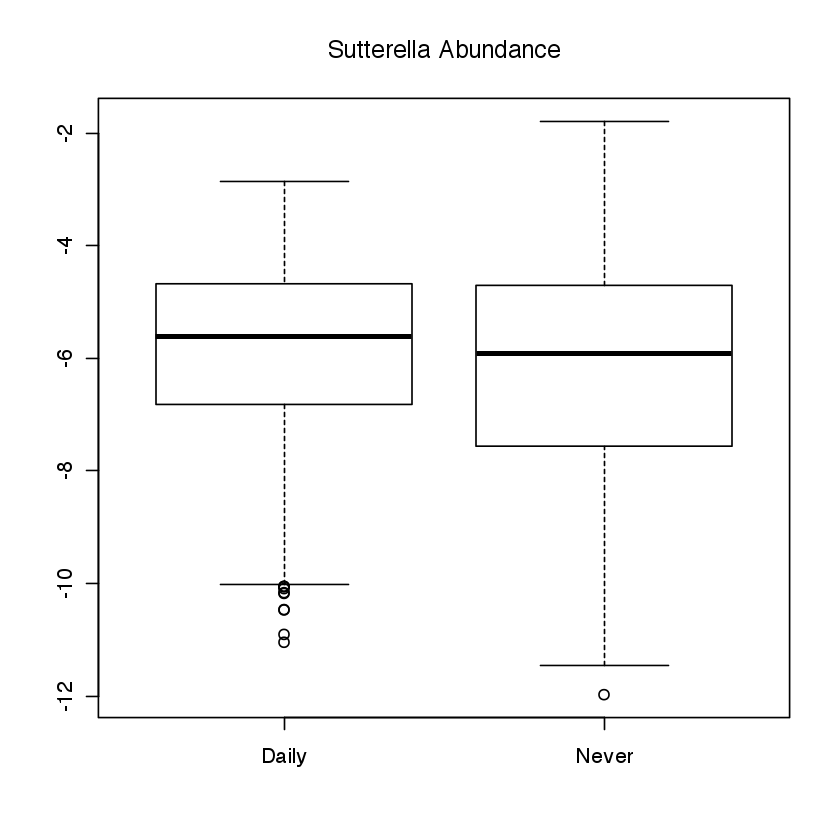

In [10]:
#Sutterella
    lm.sutterella<-lm(log(AGP_NA[,55])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.sutterella)
    boxplot(log(AGP_NA[,55])~AGP_NA$ALCOHOL_FREQUENCY, main="Sutterella Abundance") # higher abundance in drinkers


Call:
lm(formula = log(AGP_NA[, 34]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
   Min     1Q Median     3Q    Max 
-3.939 -1.219 -0.364  1.026  7.254 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -8.3703     0.1003 -83.433   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever   0.2000     0.1202   1.664   0.0964 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.792 on 1049 degrees of freedom
  (1136 observations deleted due to missingness)
Multiple R-squared:  0.002632,	Adjusted R-squared:  0.001681 
F-statistic: 2.769 on 1 and 1049 DF,  p-value: 0.09643


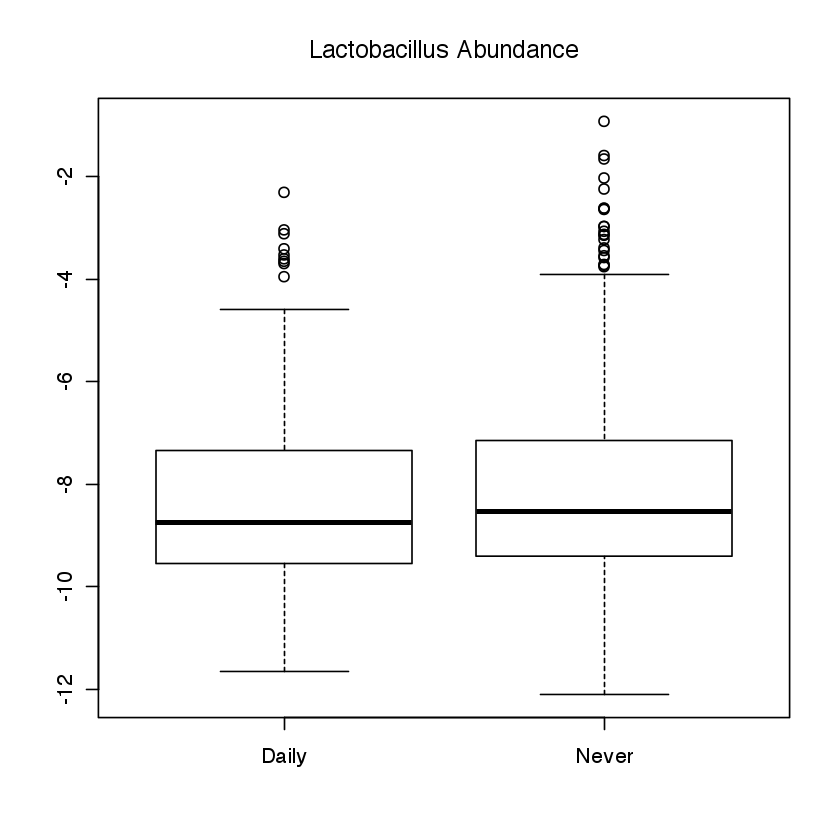

In [11]:
#Lactobacillus
    anc.lacto<-lm(log(AGP_NA[,34])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(anc.lacto) #Not significant between non and daily drinkers
    boxplot(log(AGP_NA[,34])~AGP_NA$ALCOHOL_FREQUENCY, main="Lactobacillus Abundance") #lower abundance in drinkers

[1] 0.02563059

[1] 0.02620468


Call:
lm(formula = log(AGP_NA[, 47]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9738 -0.8273  0.2264  1.0627  3.6478 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.34094    0.05710 -76.020   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.12660    0.06904  -1.834   0.0668 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.457 on 2059 degrees of freedom
  (126 observations deleted due to missingness)
Multiple R-squared:  0.001631,	Adjusted R-squared:  0.001146 
F-statistic: 3.363 on 1 and 2059 DF,  p-value: 0.06682


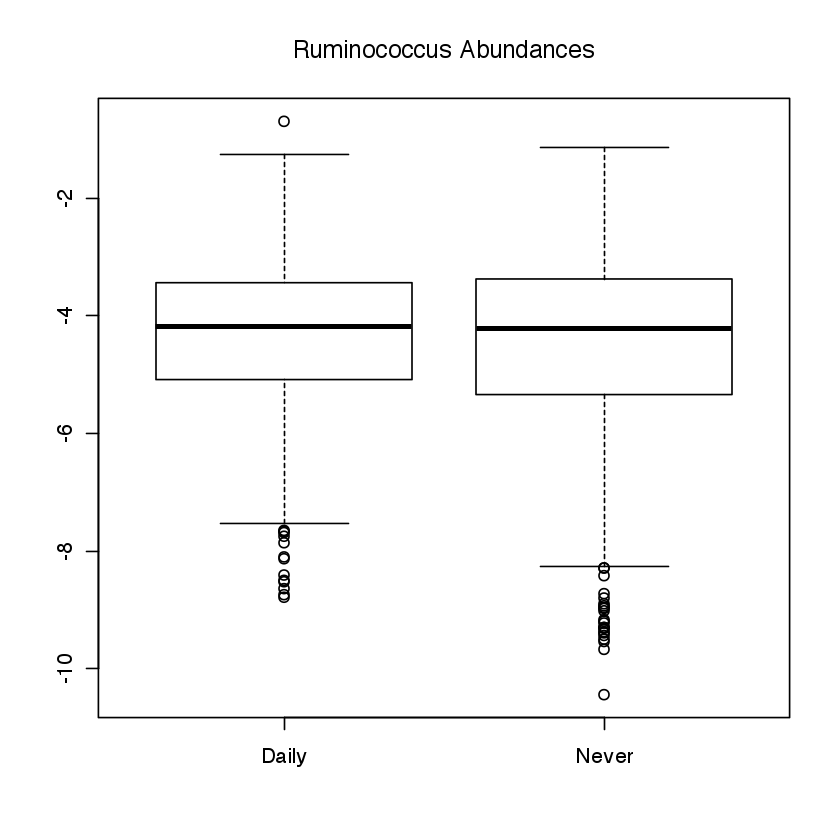

In [13]:
  #Ruminococcus
    mean(treat1[,47], na.rm=T) #0.0256 lower abundace in drinkers
    mean(treat0[,47], na.rm=T) #0.0262

    anc.rumino<-lm(log(AGP_NA[,47])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(anc.rumino) #Not signficant between non and daily drinkers
    boxplot(log(AGP_NA[,47])~AGP_NA$ALCOHOL_FREQUENCY, main="Ruminococcus Abundances") 


Call:
lm(formula = log(AGP_NA[, 17]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1729 -1.2326 -0.1069  1.1825  7.7483 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -7.74827    0.09257 -83.706   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.05222    0.10862  -0.481    0.631    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.645 on 1152 degrees of freedom
  (1033 observations deleted due to missingness)
Multiple R-squared:  0.0002006,	Adjusted R-squared:  -0.0006673 
F-statistic: 0.2311 on 1 and 1152 DF,  p-value: 0.6308



Call:
lm(formula = log(AGP_never2daily[, 17] + 1) ~ AGP_never2daily$ALCOHOL_FREQUENCY)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00183 -0.00139 -0.00090 -0.00059  0.69132 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.0018262  0.0005813   3.141   0.0017
AGP_never2daily$ALCOHOL_FREQUENCYNever -0.0009302  0.0007031  -1.323   0.1860
                                         
(Intercept)                            **
AGP_never2daily$ALCOHOL_FREQUENCYNever   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01529 on 2185 degrees of freedom
Multiple R-squared:  0.0008004,	Adjusted R-squared:  0.0003431 
F-statistic:  1.75 on 1 and 2185 DF,  p-value: 0.186


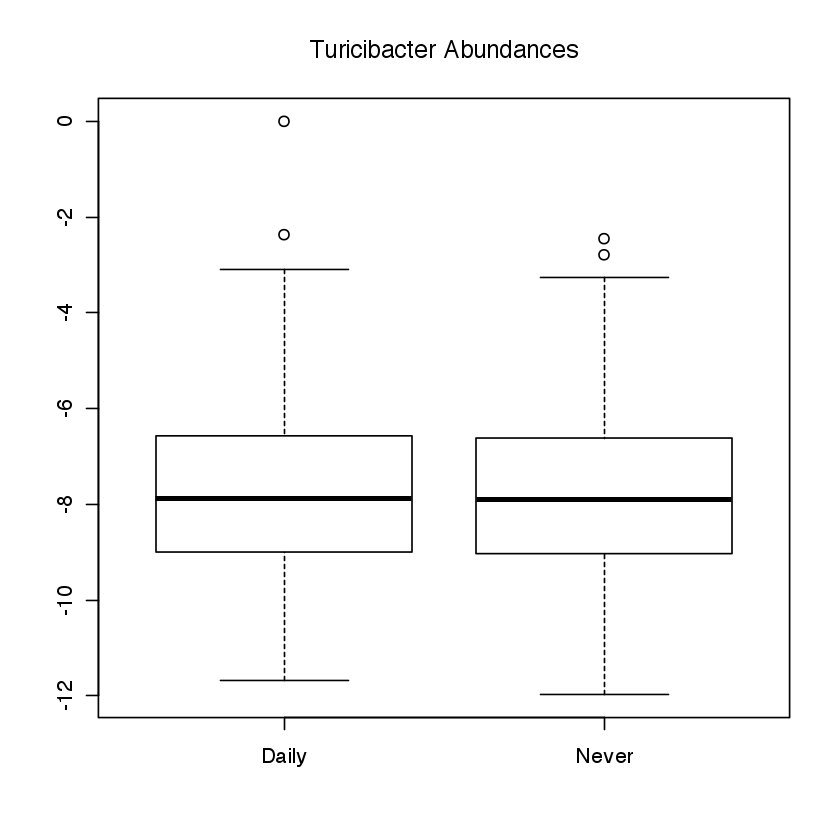

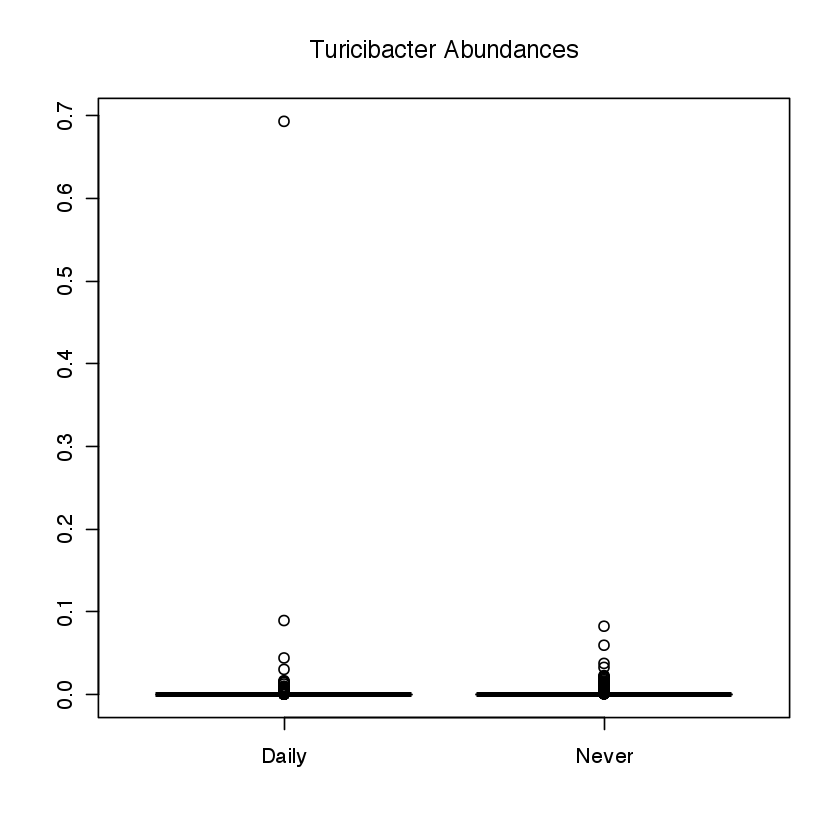

In [14]:
    #Turicibacter : Not significantly different between drinkers and non
    lm.turicibacter<-lm(log(AGP_NA[,17])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.turicibacter)
    boxplot(log(AGP_NA[,17])~AGP_NA$ALCOHOL_FREQUENCY, main="Turicibacter Abundances")
    
    #Reran tests by adding 1 (+1) to remove the "NA" abundances, still no significance
    lm.turicibacter_noNA<-lm(log(AGP_never2daily[,17]+1)~AGP_never2daily$ALCOHOL_FREQUENCY)
    summary(lm.turicibacter_noNA)
    boxplot(log(AGP_never2daily[,17]+1)~AGP_never2daily$ALCOHOL_FREQUENCY, main="Turicibacter Abundances")


Call:
lm(formula = log(AGP_NA[, 25]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
   Min     1Q Median     3Q    Max 
-5.535 -1.960  0.441  1.852  5.817 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -5.79563    0.09595 -60.404  < 2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.71444    0.11857  -6.026  2.1e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.221 on 1551 degrees of freedom
  (634 observations deleted due to missingness)
Multiple R-squared:  0.02287,	Adjusted R-squared:  0.02224 
F-statistic: 36.31 on 1 and 1551 DF,  p-value: 2.1e-09


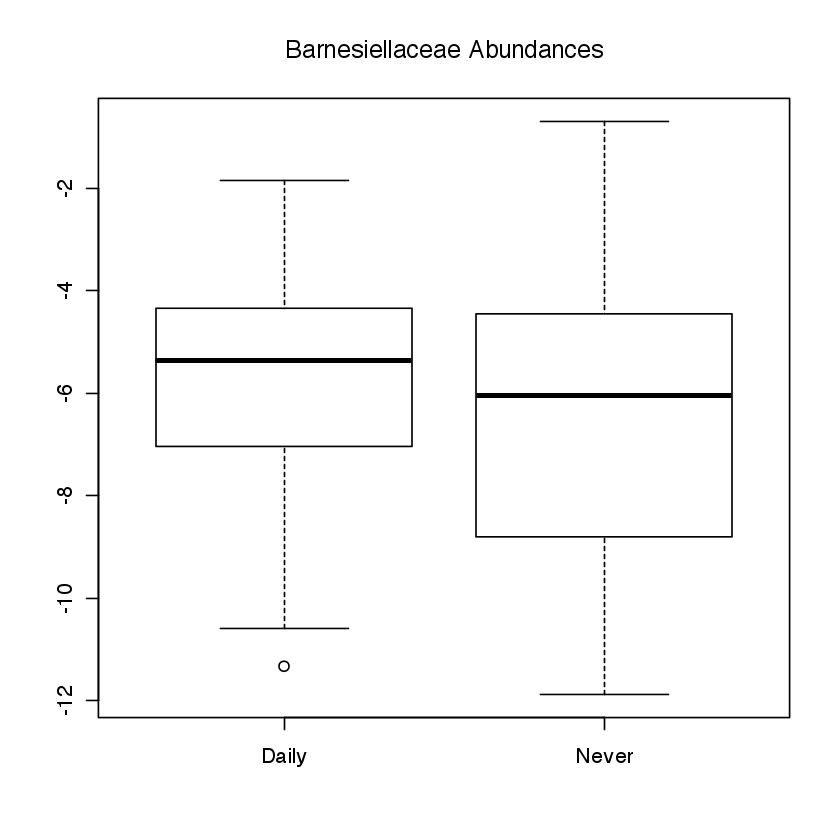

In [15]:
    #Barnesiellaceae : higher abundance in drinkers, similar to rat data
    lm.barn<-lm(log(AGP_NA[,25])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.barn) #significant between non and daily drinkers
    boxplot(log(AGP_NA[,25])~AGP_NA$ALCOHOL_FREQUENCY, main="Barnesiellaceae Abundances")


Call:
lm(formula = all_erysipelotrichaceae ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6898 -0.7671  0.0751  0.7371  4.4747 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -5.57303    0.08120 -68.633   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.06742    0.10582  -0.637    0.524    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.185 on 516 degrees of freedom
  (1669 observations deleted due to missingness)
Multiple R-squared:  0.0007859,	Adjusted R-squared:  -0.001151 
F-statistic: 0.4059 on 1 and 516 DF,  p-value: 0.5244



Call:
lm(formula = log(AGP_NA[, 31]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4146 -1.0467  0.0118  0.9616  3.9165 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -8.45182    0.09841  -85.88   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever  0.01787    0.12802    0.14    0.889    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.446 on 526 degrees of freedom
  (1659 observations deleted due to missingness)
Multiple R-squared:  3.706e-05,	Adjusted R-squared:  -0.001864 
F-statistic: 0.0195 on 1 and 526 DF,  p-value: 0.889



Call:
lm(formula = log(AGP_NA[, 50]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1022 -0.8315  0.1018  0.8924  4.6334 

Coefficients:
                              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   -5.68470    0.05591 -101.679   <2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.12172    0.06779   -1.795   0.0727 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.418 on 2008 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.001603,	Adjusted R-squared:  0.001106 
F-statistic: 3.224 on 1 and 2008 DF,  p-value: 0.07273


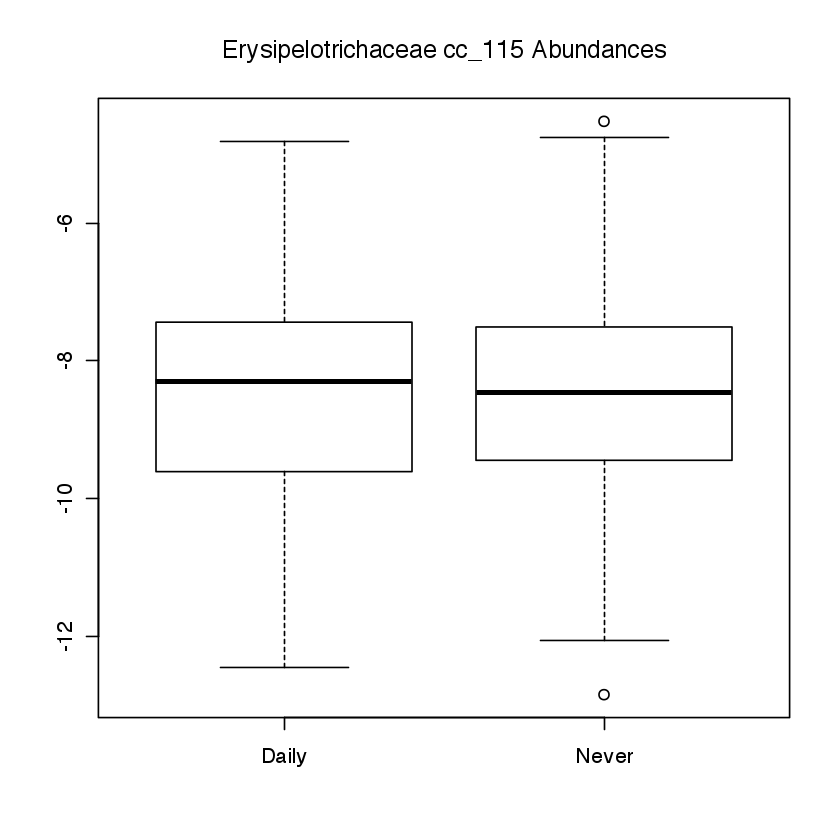

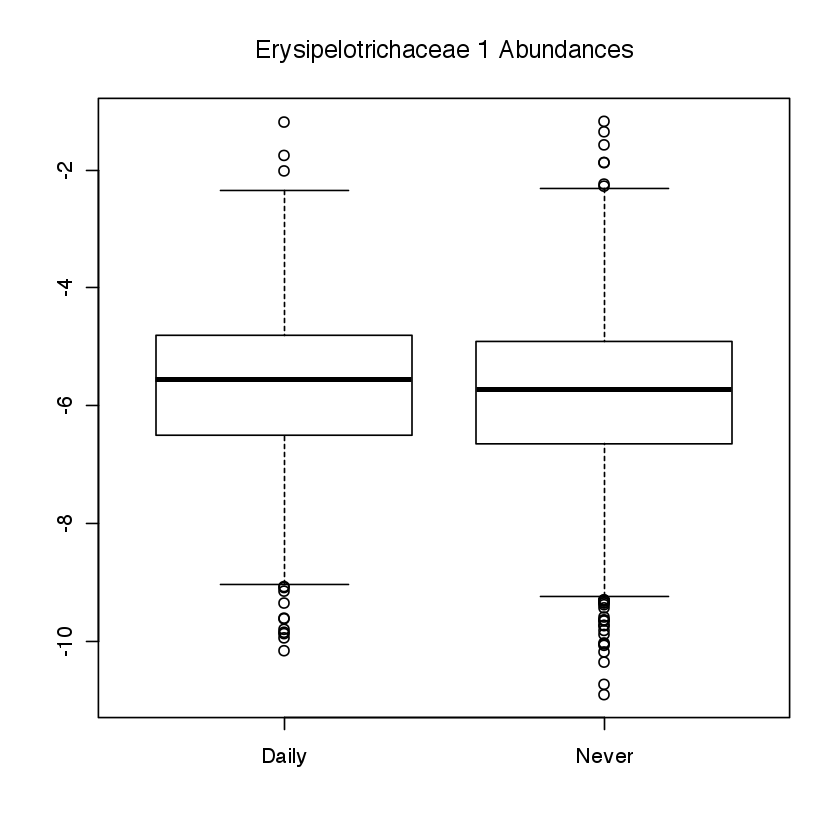

In [16]:
  #Erysipelotrichaceae : overall abundances were not significantly different between non and daily drinkers
    all_erysipelotrichaceae<-log(AGP_NA[,31]+AGP_NA[,50])
    lm.erys<-lm(all_erysipelotrichaceae~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.erys) 
    
    #genus : cc_115 : higher abundance in drinkers, comparable to rat data
    lm.cc_115<-lm(log(AGP_NA[,31])~AGP_NA$ALCOHOL_FREQUENCY) 
    summary(lm.cc_115) #not significant between non and daily drinkers
    boxplot(log(AGP_NA[,31])~AGP_NA$ALCOHOL_FREQUENCY, main="Erysipelotrichaceae cc_115 Abundances") 
    
    #Erysipelotricheaceae, no genus or species : higher abundance in drinkers
    lm.erys1<-lm(log(AGP_NA[,50])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.erys1) #not significant between non and daily drinkers
    boxplot(log(AGP_NA[,50])~AGP_NA$ALCOHOL_FREQUENCY, main="Erysipelotrichaceae 1 Abundances")


Call:
lm(formula = log(AGP_NA[, 53]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2025 -1.7512  0.1517  1.7610  5.1206 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -6.4624     0.1107 -58.372  < 2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever  -0.6279     0.1391  -4.514 7.05e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.211 on 1087 degrees of freedom
  (1098 observations deleted due to missingness)
Multiple R-squared:  0.0184,	Adjusted R-squared:  0.0175 
F-statistic: 20.38 on 1 and 1087 DF,  p-value: 7.048e-06


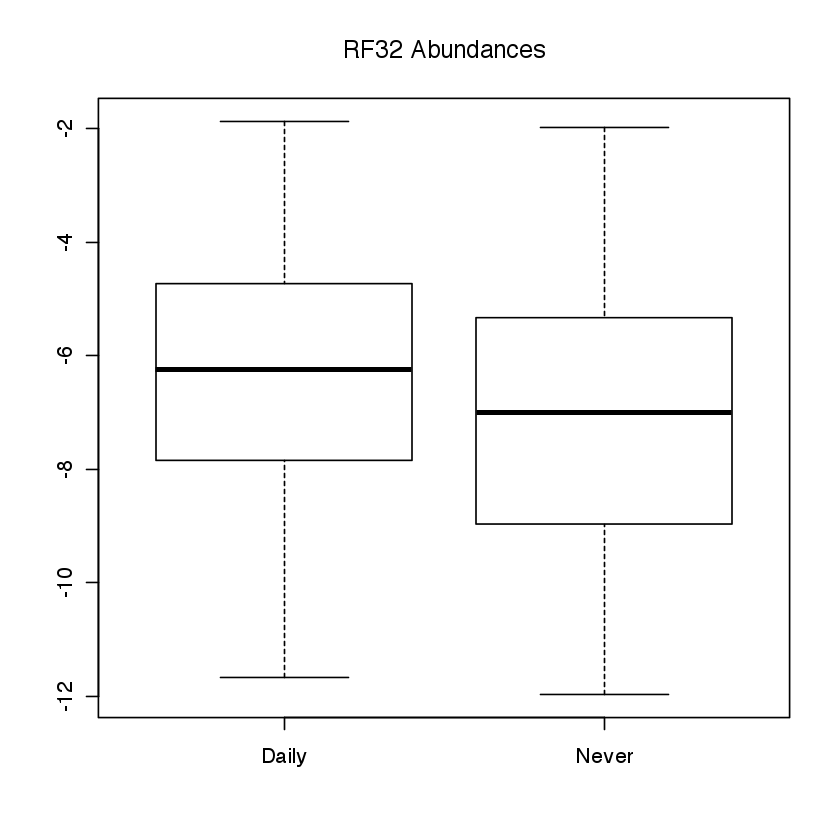

In [17]:
  #RF32 : #higher abundance in drinkers, opposite of rat data
    lm.rf32<-lm(log(AGP_NA[,53])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.rf32) #significant between non and daily drinkers
    boxplot(log(AGP_NA[,53])~AGP_NA$ALCOHOL_FREQUENCY, main="RF32 Abundances")


Call:
lm(formula = log(AGP_NA[, 28]) ~ AGP_NA$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4102 -0.5396  0.2065  0.8033  4.7812 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.78121    0.04924  -97.10  < 2e-16 ***
AGP_NA$ALCOHOL_FREQUENCYNever -0.29911    0.05958   -5.02 5.62e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.249 on 2026 degrees of freedom
  (159 observations deleted due to missingness)
Multiple R-squared:  0.01229,	Adjusted R-squared:  0.0118 
F-statistic:  25.2 on 1 and 2026 DF,  p-value: 5.622e-07


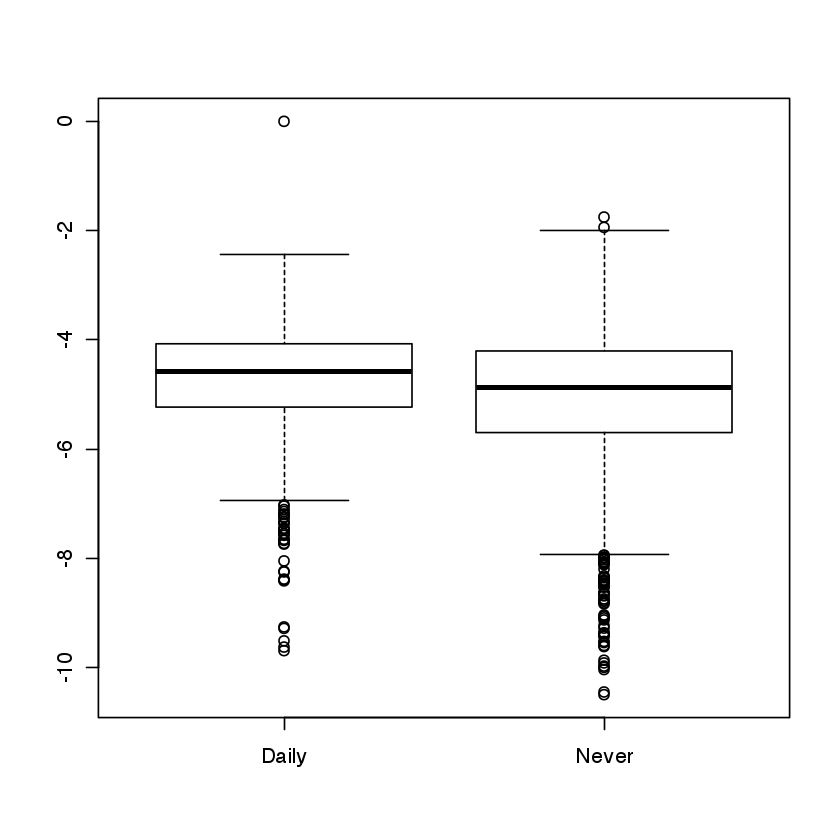

In [18]:
  #Oscillospira : higher abundance in drinkers, similar to one of the species of Oscillospira in rat data
    lm.oscillo<-lm(log(AGP_NA[,28])~AGP_NA$ALCOHOL_FREQUENCY)
    summary(lm.oscillo) #significant between non and daily drinkers
    boxplot(log(AGP_NA[,28])~AGP_NA$ALCOHOL_FREQUENCY) 

In [21]:
#Alpha Diversity between non and daily drinkers
    #Read the file from ftp
    AGP<-read.delim("ag-cleaned_L6sample.txt", header=T)
    
    #gathering samples that are only fecal samples
    AGP_fecal<-subset(AGP, AGP$SIMPLE_BODY_SITE=="FECAL")
    
    #Created a subset of fecal samples from non ("Never) and daily ("Daily") drinkers
    AGP_never2daily<-subset(AGP_fecal, AGP_fecal$ALCOHOL_FREQUENCY=="Never" | AGP_fecal$ALCOHOL_FREQUENCY=="Daily")
    AGP_never2daily$ALCOHOL_FREQUENCY<-factor(AGP_never2daily$ALCOHOL_FREQUENCY)
    
    #Creating a data frame with sample metadata
    treatment<-AGP_never2daily[,c(1,186)]
    agp_alpha<-read.delim("alpha_rarefaction_10000_9.txt", header=T)  
    alpha_merge<-merge(treatment,agp_alpha)   

In [22]:
alpha_merge

,X.SampleID,ALCOHOL_FREQUENCY,PD_whole_tree,chao1,observed_otus,shannon
1,10317.000001038,Daily,37.34825,729.214285714,546,6.39097038006
2,10317.000001042,Daily,37.89162,615.407407407,497,6.6701986245
3,10317.000001046,Never,28.07041,419.898305085,336,4.77858105024
4,10317.000001072,Daily,25.73193,455.058823529,322,4.85662729528
5,10317.000001100,Never,24.31776,429.018867925,320,4.63097200791
6,10317.000001115,Never,31.144,530.158730159,369,4.78995248944
7,10317.000001128,Never,21.78263,353.243902439,280,5.1280967888
8,10317.000001135,Never,9.85148,136.866666667,90,1.49433617608
9,10317.000001140,Never,30.60277,505,380,5.72823158951
10,10317.000001141,Daily,27.21911,426.541666667,355,5.20672560879



Call:
lm(formula = alpha_merge$PD_whole_tree ~ alpha_merge$ALCOHOL_FREQUENCY, 
    data = alpha_merge)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.717  -4.324   0.025   4.228  46.177 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         32.1605     0.3092 104.004  < 2e-16 ***
alpha_merge$ALCOHOL_FREQUENCYNever  -2.6748     0.3733  -7.165  1.2e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.796 on 1537 degrees of freedom
Multiple R-squared:  0.03232,	Adjusted R-squared:  0.03169 
F-statistic: 51.34 on 1 and 1537 DF,  p-value: 1.2e-12



Call:
lm(formula = alpha_merge$chao1 ~ alpha_merge$ALCOHOL_FREQUENCY, 
    data = alpha_merge)

Residuals:
    Min      1Q  Median      3Q     Max 
-484.65 -118.56   -9.84   98.09 1672.57 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         641.288      8.455  75.851  < 2e-16 ***
alpha_merge$ALCOHOL_FREQUENCYNever  -58.138     10.207  -5.696 1.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 185.8 on 1537 degrees of freedom
Multiple R-squared:  0.02067,	Adjusted R-squared:  0.02004 
F-statistic: 32.45 on 1 and 1537 DF,  p-value: 1.466e-08


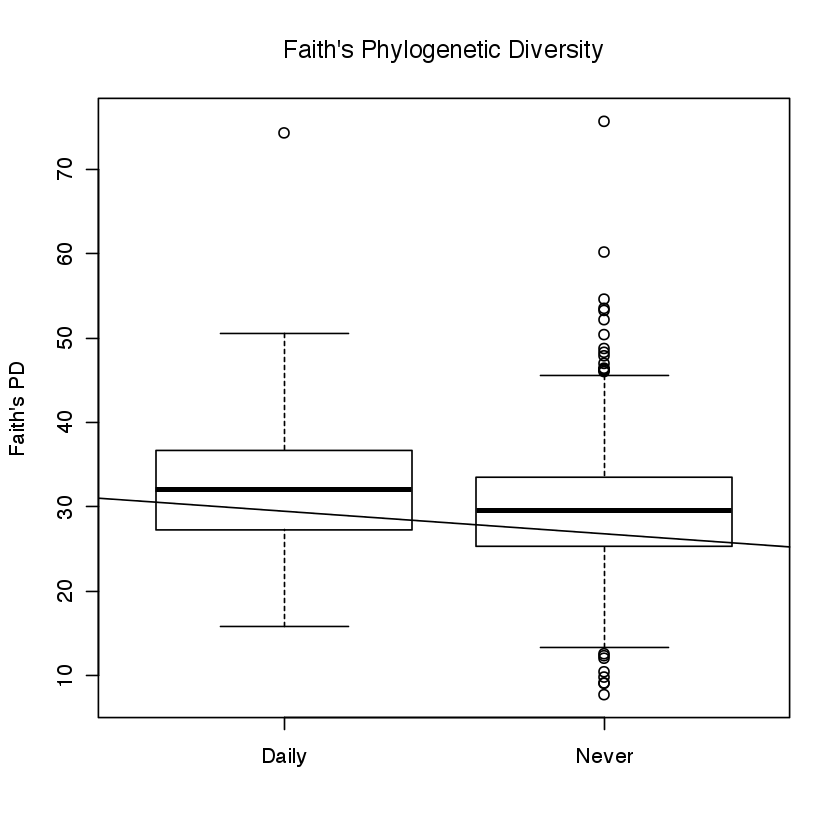

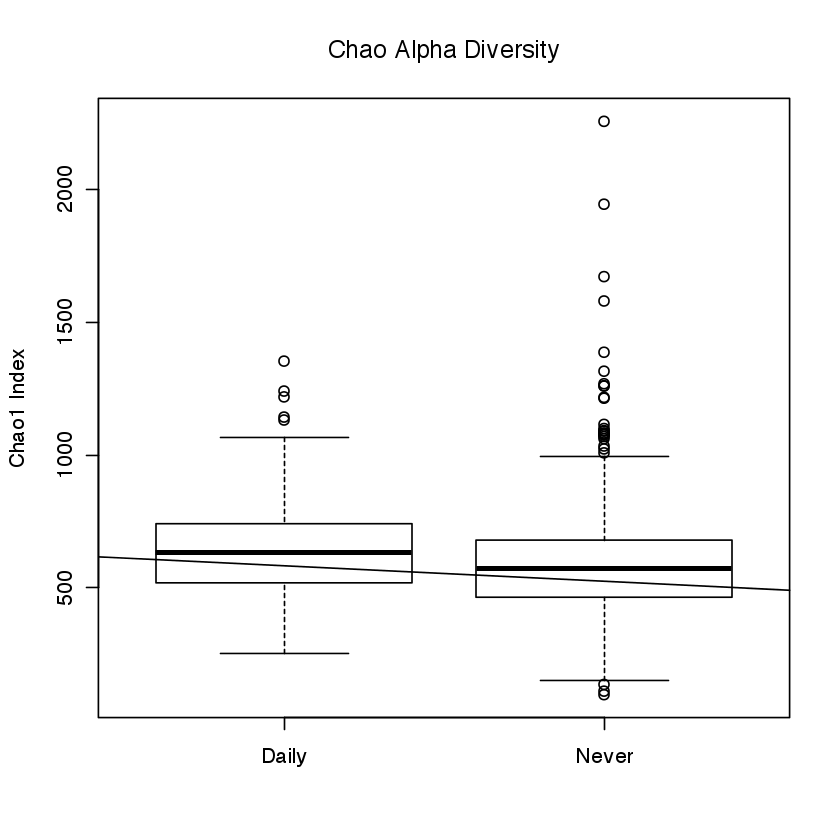

In [23]:
      #Faith's Phylogenetic Diversity (Never vs. Daily drinkers)
      lm.pd<-lm(alpha_merge$PD_whole_tree~alpha_merge$ALCOHOL_FREQUENCY, data=alpha_merge)
      summary(lm.pd)
      plot(alpha_merge$ALCOHOL_FREQUENCY, alpha_merge$PD_whole_tree, main="Faith's Phylogenetic Diversity", ylab="Faith's PD")
      abline(lm.pd)
#---------------------------------------------
      #Chao1 Diversity (Never vs. Daily drinkers)
      lm.chao<-lm(alpha_merge$chao1~alpha_merge$ALCOHOL_FREQUENCY, data=alpha_merge)
      summary(lm.chao)
      plot(alpha_merge$ALCOHOL_FREQUENCY, alpha_merge$chao1, main="Chao Alpha Diversity", ylab="Chao1 Index")
      abline(lm.chao)


Call:
lm(formula = FB_never2daily$FB ~ FB_never2daily$ALCOHOL_FREQUENCY)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74856 -0.18960 -0.01221  0.17493  0.64124 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.055415   0.010208   5.429 6.31e-08 ***
FB_never2daily$ALCOHOL_FREQUENCYNever -0.003504   0.012347  -0.284    0.777    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2685 on 2185 degrees of freedom
Multiple R-squared:  3.686e-05,	Adjusted R-squared:  -0.0004208 
F-statistic: 0.08054 on 1 and 2185 DF,  p-value: 0.7766


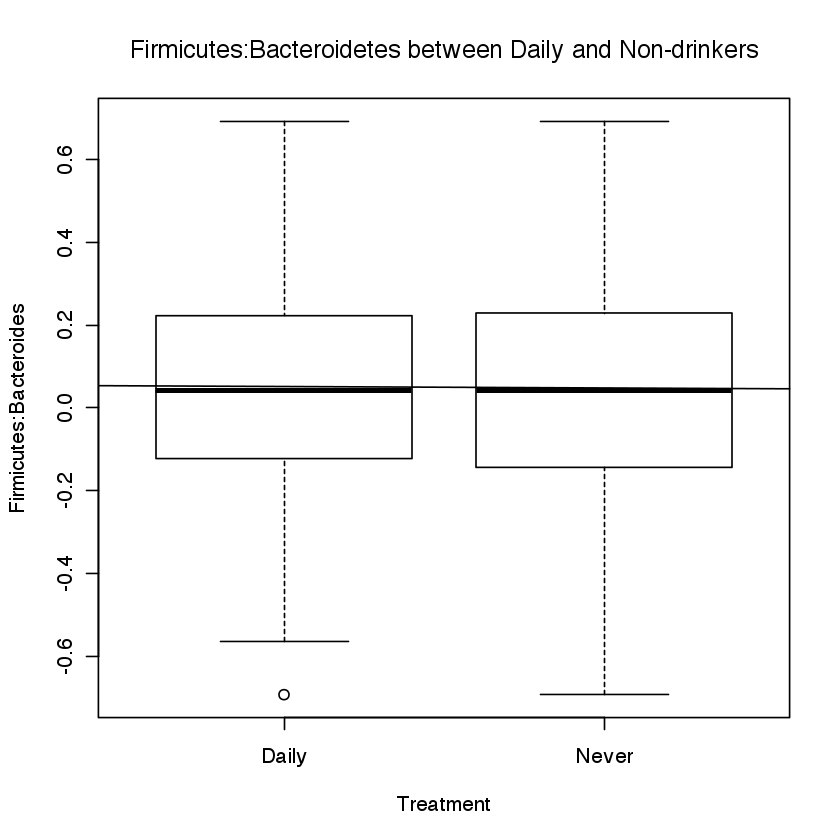

In [24]:
  #F/B ratio
     #merge sample data with F/B Data
      treatment<-AGP_never2daily[,c(1,186)]
      FB<-read.delim("FB_AGP.txt", header=T)
      FB_never2daily<-merge(FB, treatment)

      #F/B ratio between treatments : Not significantly different between daily and non drinkers
      FB_never2daily$FB<-log((FB_never2daily$Firmicutes+1)/(FB_never2daily$Bacteroidetes+1))
      lm.FB<-lm(FB_never2daily$FB~FB_never2daily$ALCOHOL_FREQUENCY)
      summary(lm.FB)
      plot(FB~ALCOHOL_FREQUENCY, data=FB_never2daily, main="Firmicutes:Bacteroidetes between Daily and Non-drinkers", xlab="Treatment", ylab="Firmicutes:Bacteroides")
      abline(lm.FB)

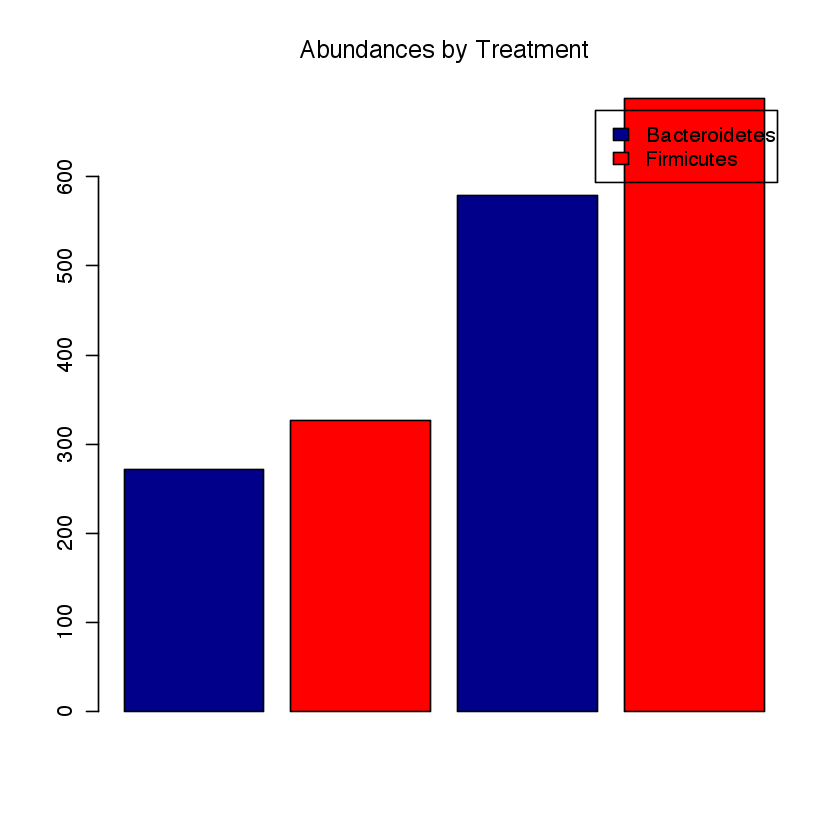

In [40]:
      #Reading in a table with species abundance and treatment data from AGP
      FB_hist<-read.csv("FB_barchart.csv", header=T)
      
        #Plotting abundancees by treatment
        aggdata <-aggregate(FB_hist$Abundance, by=list(FB_hist$Species, FB_hist$Treatment),FUN=sum, na.rm=TRUE)
        barplot(aggdata$x, main="Abundances by Treatment",xlab=aggdata$Treatment, axis.lty=1, col=c("darkblue","red"),legend = aggdata$Group.1[1:2])


Call:
lm(formula = FB_hist$Abundance ~ FB_hist$Species * FB_hist$Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47197 -0.15114  0.00146  0.15085  0.61277 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                       0.392939   0.008084  48.608
FB_hist$SpeciesFirmicutes                         0.079030   0.011432   6.913
FB_hist$TreatmentNever                           -0.005710   0.009777  -0.584
FB_hist$SpeciesFirmicutes:FB_hist$TreatmentNever -0.006006   0.013827  -0.434
                                                 Pr(>|t|)    
(Intercept)                                       < 2e-16 ***
FB_hist$SpeciesFirmicutes                        5.44e-12 ***
FB_hist$TreatmentNever                              0.559    
FB_hist$SpeciesFirmicutes:FB_hist$TreatmentNever    0.664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2127 on 4

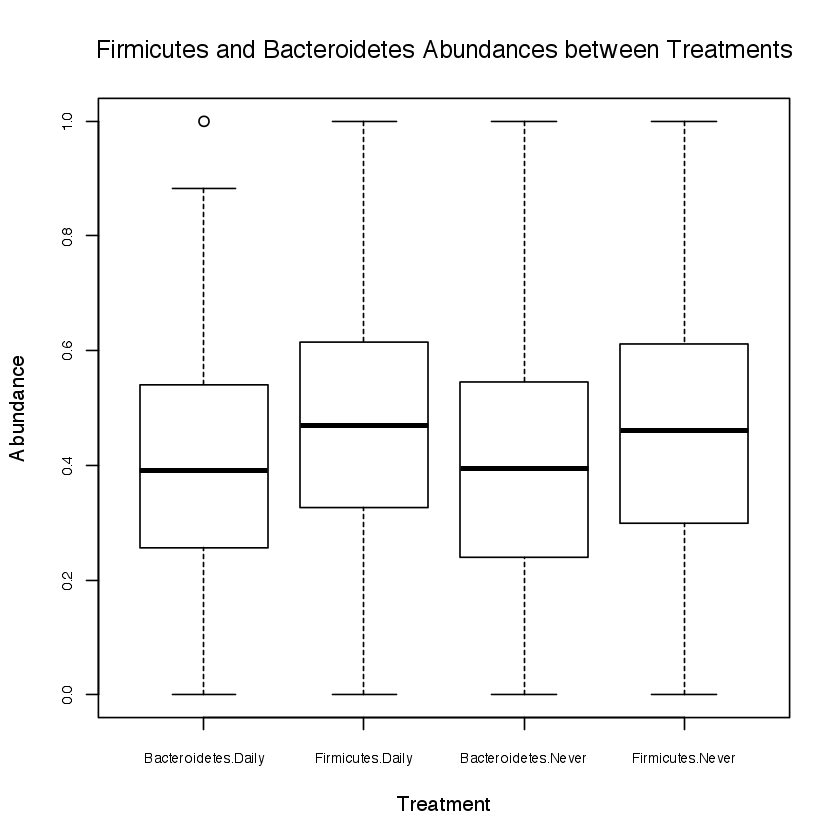

In [54]:
        #Plotting Abundance by Treatment and Species
        lm.FB<-lm(FB_hist$Abundance~FB_hist$Species*FB_hist$Treatment)
        summary(lm.FB)
        boxplot(FB_hist$Abundance~FB_hist$Species*FB_hist$Treatment, cex.axis=0.65, main="Firmicutes and Bacteroidetes Abundances between Treatments", xlab="Treatment", ylab="Abundance")
